# pypdb demos

This is a set of basic examples of the kinds of queries and formats used by pypdb. There are generally two types of function:

+ Functions that perform searches and return lists of PDB IDs
+ Functions that get information about specific PDB IDs

The list of supported search types, as well as the different types of information that can be returned for a given PDB ID, is large (and growing) and is enumerated completely in the docstrings of pypdb.py. The PDB allows a very wide range of different types of queries, and so any option that is not currently available can likely be implemented pretty easily based on the structure of the query types that have already been implemented. I appreciate any feedback and pull requests.

### Preamble

In [1]:
%pylab inline
from pypdb import *
import pprint

Populating the interactive namespace from numpy and matplotlib


# 1. Search functions that return lists of PDB IDs

### Get a list of PDBs for a specific search term

In [2]:
search_dict = make_query('actin network')
found_pdbs = do_search(search_dict)
print(found_pdbs)

['1D7M', '3W3D', '4A7H', '4A7L', '4A7N']


### Search by a specific modified structure

In [14]:
search_dict = make_query('3W3D',querytype='ModifiedStructuresQuery')
found_pdbs = do_search(search_dict)
print(found_pdbs)

['1QLJ', '1S3T', '2F5N', '2G9V', '2N46', '2N47', '2N48', '2RNM', '2Z0P', '3DLL', '3F6F', '3G7I', '3GH6', '3MAK', '3WH8', '3X0E', '3X0F', '3X0G', '4C16', '4COU', '4COV', '4COW', '4COY', '4COZ', '4CSY', '4CZS', '4D3W', '4MTL', '4PF7', '4PF9', '4PFC', '4QR9', '4RVK', '4RVL', '4RX4', '4RZQ', '4TL6', '4TL7', '4TLC', '4TLD', '4TLE', '4TRW', '4TSD', '4U54', '4U58', '4U5L', '4U5N', '4U5O', '4U5S', '4U5U', '4U5V', '4UMS', '4URP', '4X43', '4XK8', '4XPN', '4XS0', '4XTT', '4Y0P', '4Y0Q', '4Y0R', '4Y0S', '4Y2H', '4Y30', '4YDX', '4YE3', '4YEA', '4YGW', '4YHQ', '4YL0', '4YL1', '4YMG', '4YMH', '4YMK', '4YMR', '4YND', '4YO6', '4YP3', '4YP8', '4YQW', '4YQX', '4YR0', '4YR2', '4YR3', '4YUE', '4YVC', '4YVE', '4Z1L', '4Z2G', '4Z2H', '4Z2I', '4Z2J', '4Z2K', '4Z2L', '4Z3W', '4Z3X', '4Z3Y', '4Z3Z', '4Z40', '4Z93', '4ZCH', '4ZFP', '4ZGD', '4ZGE', '4ZGJ', '4ZIQ', '4ZIU', '4ZJG', '4ZJH', '4ZMJ', '4ZN4', '4ZN8', '4ZOV', '4ZOX', '4ZOY', '4ZOZ', '5A2I', '5A2J', '5A2K', '5A2L', '5ALS', '5AUN', '5AUO', '5AUP', '5AUQ',

### Search by Author

In [5]:
search_dict = make_query('Perutz, M.F.',querytype='AdvancedAuthorQuery')
found_pdbs = do_search(search_dict)
print(found_pdbs)

['1CQ4', '1FDH', '1GDJ', '1HDA', '1PBX', '2DHB', '2GDM', '2HHB', '2MHB', '3HHB', '4HHB']


### Search by Motif

In [8]:
search_dict = make_query('T[AG]AGGY',querytype='MotifQuery')
found_pdbs = do_search(search_dict)
print(found_pdbs)

['3LEZ', '3SGH', '4F47']


### Search by a specific experimental method

In [12]:
search_dict = make_query('SOLID-STATE NMR',querytype='ExpTypeQuery')
found_pdbs = do_search(search_dict)
print(found_pdbs)

['1CEK', '1EQ8', '1M8M', '1MAG', '1MP6', '1MZT', '1NH4', '1NYJ', '1PI7', '1PI8', '1PJD', '1PJE', '1PJF', '1Q7O', '1RVS', '1XSW', '1ZN5', '1ZY6', '2C0X', '2CZP', '2E8D', '2H3O', '2H95', '2JSV', '2JU6', '2JZZ', '2K0P', '2KAD', '2KB7', '2KHT', '2KIB', '2KJ3', '2KLR', '2KQ4', '2KQT', '2KRJ', '2KSJ', '2KWD', '2KYV', '2L0J', '2L3Z', '2LBU', '2LEG', '2LGI', '2LJ2', '2LME', '2LMN', '2LMO', '2LMP', '2LMQ', '2LNL', '2LNQ', '2LNY', '2LPZ', '2LTQ', '2LU5', '2M02', '2M3B', '2M3G', '2M4J', '2M5K', '2M5M', '2M5N', '2M67', '2MC7', '2MCU', '2MCV', '2MCW', '2MCX', '2MEX', '2MJZ', '2MME', '2MMU', '2MPZ', '2MSG', '2MTZ', '2MVX', '2MXU', '2N0R', '2NNT', '2RLZ', '2UVS', '2W0N', '2XKM', '3ZPK']


### Search by whether it has free ligands

In [4]:
search_dict = make_query('', querytype='NoLigandQuery')
found_pdbs = do_search(search_dict)
print(found_pdbs[:10])

['100D', '101D', '101M', '102D', '102L', '102M', '103L', '103M', '104M', '105M']


### Estimate total number of depositions versus time

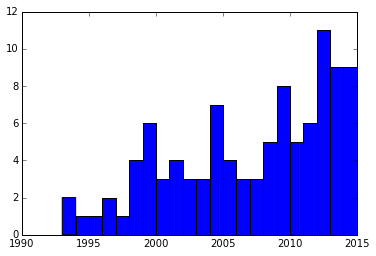

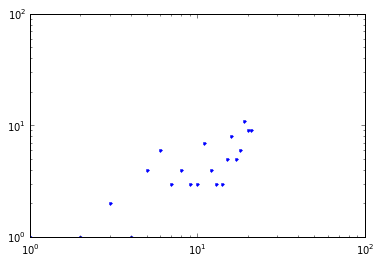

In [7]:
# Choose a random sample because we don't want to call the database for every single entry
from random import choice

all_pdbs = get_all()

all_dates = list()

for ii in range(100):
    pdb_desc = describe_pdb( choice(all_pdbs) )
    depdate = (pdb_desc['deposition_date'])
    all_dates.append( int(depdate[:4]) )
    
all_dates = array(all_dates)

figure()
subs_v_time = hist(all_dates, max(all_dates)-min(all_dates))
show(subs_v_time)   

# Show power-law scaling
figure()
loglog(subs_v_time[0],'.')

### Find the number of references to CRISPR over time

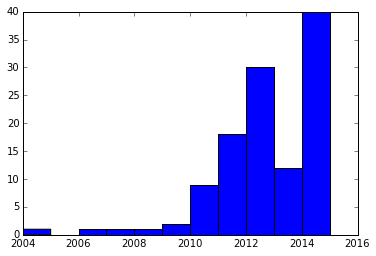

In [8]:
search_dict = make_query('CRISPR')
crispr_results = do_search(search_dict)


all_pdbs = get_all()

all_dates = list()

for pdb in crispr_results:
    pdb_desc = describe_pdb( pdb )
    depdate = (pdb_desc['deposition_date'])
    all_dates.append( int(depdate[:4]) )
    
all_dates = array(all_dates)
subs_v_time = hist(all_dates, max(all_dates)-min(all_dates))
show(subs_v_time)   

# 2. Functions that return information about single PDB entries

### Get a general description of the entry

In [5]:
describe_pdb('4lza')

{'citation_authors': 'Malashkevich, V.N., Bhosle, R., Toro, R., Hillerich, B., Gizzi, A., Garforth, S., Kar, A., Chan, M.K., Lafluer, J., Patel, H., Matikainen, B., Chamala, S., Lim, S., Celikgil, A., Villegas, G., Evans, B., Love, J., Fiser, A., Khafizov, K., Seidel, R., Bonanno, J.B., Almo, S.C.',
 'deposition_date': '2013-07-31',
 'expMethod': 'X-RAY DIFFRACTION',
 'keywords': 'TRANSFERASE',
 'last_modification_date': '2013-08-14',
 'nr_atoms': '0',
 'nr_entities': '1',
 'nr_residues': '390',
 'release_date': '2013-08-14',
 'resolution': '1.84',
 'status': 'CURRENT',
 'structureId': '4LZA',
 'structure_authors': 'Malashkevich, V.N., Bhosle, R., Toro, R., Hillerich, B., Gizzi, A., Garforth, S., Kar, A., Chan, M.K., Lafluer, J., Patel, H., Matikainen, B., Chamala, S., Lim, S., Celikgil, A., Villegas, G., Evans, B., Love, J., Fiser, A., Khafizov, K., Seidel, R., Bonanno, J.B., Almo, S.C., New York Structural Genomics Research Consortium (NYSGRC)',
 'title': 'Crystal structure of adenin

### Run a BLAST search on an entry

The tuple returned by this function contains a ranked list of closest BLAST matches, as well as the text file representing the actual seqence similarity

In [8]:
blast_results = get_blast('2F5N')
print('Total Results: ' + str(len(blast_results[0])) +'\n')
pprint.pprint(blast_results[1][50])

Total Results: 250

<pre>\n&gt;<a name="74936"></a>3D17:1:A,C|pdbid|entity|chain(s)|sequence\n          Length = 141\n\n Score =  143 bits (360), Expect = 7e-35,   Method: Composition-based stats.\n Identities = 79/80 (98%), Positives = 79/80 (98%), Gaps = 1/80 (1%)\n\nQuery: 1  VLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGK 60\n          VLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGK\nSbjct: 1  VLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGK 60\n\nQuery: 61 KVADALT-AVAHVDDMPNAL 79\n          KVADALT AVAHVDDMPNAL\nSbjct: 61 KVADALTNAVAHVDDMPNAL 80\n</pre>


### Get PFAM information about an entry

In [9]:
get_pfam('2LME')

{'pfamHit': {'@chainId': 'A',
  '@eValue': '5.0E-22',
  '@pdbResNumEnd': '105',
  '@pdbResNumStart': '28',
  '@pfamAcc': 'PF03895.10',
  '@pfamDesc': 'YadA-like C-terminal region',
  '@pfamName': 'YadA_anchor',
  '@structureId': '2LME'}}

### Get chemical info

This function takes the name of the chemical, not a PDB ID

In [7]:
describe_chemical('NAG')

{'describeHet': {'ligandInfo': {'ligand': {'@chemicalID': 'NAG',
    '@molecularWeight': '221.208',
    '@type': 'D-saccharide',
    'InChI': 'InChI=1S/C8H15NO6/c1-3(11)9-5-7(13)6(12)4(2-10)15-8(5)14/h4-8,10,12-14H,2H2,1H3,(H,9,11)/t4-,5-,6-,7-,8-/m1/s1',
    'InChIKey': 'OVRNDRQMDRJTHS-FMDGEEDCSA-N',
    'chemicalName': 'N-ACETYL-D-GLUCOSAMINE',
    'formula': 'C8 H15 N O6',
    'smiles': 'CC(=O)N[C@@H]1[C@H]([C@@H]([C@H](O[C@H]1O)CO)O)O'}}}}

### Get ligand info if present


In [6]:
get_ligands('100D')

{'id': '100D',
 'ligandInfo': {'ligand': {'@chemicalID': 'SPM',
   '@molecularWeight': '202.34',
   '@structureId': '100D',
   '@type': 'non-polymer',
   'InChI': 'InChI=1S/C10H26N4/c11-5-3-9-13-7-1-2-8-14-10-4-6-12/h13-14H,1-12H2',
   'InChIKey': 'PFNFFQXMRSDOHW-UHFFFAOYSA-N',
   'chemicalName': 'SPERMINE',
   'formula': 'C10 H26 N4',
   'smiles': 'C(CCNCCCN)CNCCCN'}}}

### Get gene ontology info

In [10]:
get_gene_onto('4Z0L ')

{'term': [{'@chainId': 'A',
   '@id': 'GO:0001516',
   '@structureId': '4Z0L',
   'detail': {'@definition': 'The chemical reactions and pathways resulting in the formation of prostaglandins, any of a group of biologically active metabolites which contain a cyclopentane ring.',
    '@name': 'prostaglandin biosynthetic process',
    '@ontology': 'B',
    '@synonyms': 'prostaglandin anabolism, prostaglandin biosynthesis, prostaglandin formation, prostaglandin synthesis'}},
  {'@chainId': 'A',
   '@id': 'GO:0001525',
   '@structureId': '4Z0L',
   'detail': {'@definition': 'Blood vessel formation when new vessels emerge from the proliferation of pre-existing blood vessels.',
    '@name': 'angiogenesis',
    '@ontology': 'B',
    '@synonyms': 'blood vessel formation from pre-existing blood vessels'}},
  {'@chainId': 'A',
   '@id': 'GO:0006629',
   '@structureId': '4Z0L',
   'detail': {'@definition': 'The chemical reactions and pathways involving lipids, compounds soluble in an organic solven